Il compito di questo progetto è realizzare un modello di Machine Learning in grado di prevedere se un messaggio è SPAM o Ham(“E-mail that is generally desired and isn't considered spam.”).

<br> Il set di dati per questo caso di studio può essere trovato su Kaggle.<br>
I dati Consistono in 5574 messaggi di testo in inglese.<br>

Di seguito la struttura del Notebook:<br>
-Analisi dei dati e  pulizia<br>
-Visualizzazioni<br>
-Modellazione Algoritmo<br>
-Conclusione<br>

In [57]:
import pandas as pd
# import pandas library to have the operational features

df=pd.read_csv("C:/Users/Alessandro/Desktop/spam.csv", encoding="latin-1")
# open the file in Desktop named spam.csv, encoding some unreadable characters

df.head(2)
# df is diminutive of DataFrame, with this I ask to see the first 2 row

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


<br/><br/>

## Data Analysis and Cleaning

In [58]:
df.rename({"v1":"Category", "v2":"Message"}, axis=1, inplace=True)
#rename columns 
df.head(2)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [59]:
df.shape
#Print the shape (Get the number of rows and cols)

(5571, 2)

In [60]:
df.drop_duplicates(inplace = True)
#Checking for duplicates and removing them

In [61]:
df.shape

(5168, 2)

<br/><br/>

## Visualization

iniziamo a svolgere alcuni calcoli per vedere con che cosa abbiamo a che fare, siamo interessati alla differenza nel numero di messaggi Ham e di Spam.

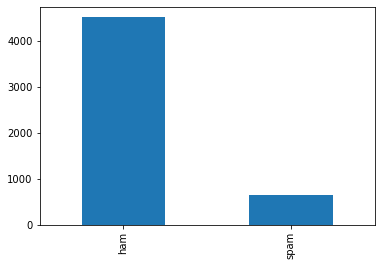

In [62]:
df["Category"].value_counts().plot(kind="bar")

# Number of message divided by category spam 653 and ham 4516

Cerchiamo adesso di capire in che percentuale

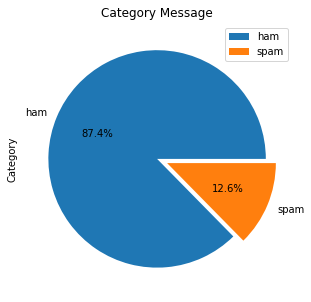

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
df["Category"].value_counts().plot(kind="pie", figsize=(5, 5), explode=[0,0.1], autopct = '%1.1f%%' )

# the library Matplotlib is used for visualization, let's see with pie chart how % of Spam and Ham in df 
# use value_counts().plot for plot the number in Category column
# autopct = '%1.1f%%'  show the percentage

plt.legend(["ham","spam"])
plt.title("Category Message")
plt.show()

<br/><br/>

## Machine Learning Models 

Nei modelli di machine learning è prassi comune convertire le variabili categoriche, ad esempio testo, nella loro rappresentazione numerica. <br>
Convertiamo con CountVectorizer il testo di ogni messaggio in una rappresentazione numerica:

1)Create an instance of the CountVectorizer class.<br>
2)Call the fit() function in order to learn a vocabulary from one or more documents.<br>
3)Call the transform() function on one or more documents as needed to encode each as a vector.<br>


In [133]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Vect_df= vectorizer.fit_transform(df["Message"])
#print(vectorizer.get_feature_names())

#pd.DataFrame(X_dtm.toarray(),columns=vectorizer.get_feature_names())

i dati che utilizziamo per il modello devono essere suddivisi in dati di addestramento e dati di test. il set di addestramento (Training) contiene un output noto e il modello apprende su questi dati per essere successivamente collaudato nei dati di Test.

In [136]:
from sklearn.model_selection import train_test_split

# X= Vect_df
y=df["Category"]
#impostiamo i dati di X e y, stiamo cercando di trovare un associazione fra la category
#spam or Ham ed il testo dei messaggi.



# split into 80% training and 30% testing
X_train,X_test,y_train,y_test = train_test_split(Vect_df,y, test_size = 0.3, random_state = 10)



print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3617, 8671) (3617,)
(1551, 8671) (1551,)


Create and train the Naive Bayes Classifier: <br>
Usiamo un algoritmo in grado di risolvere problemi di classificazione e calcolare la probabilità di una causa che ha causato un evento. Per esempio si può calcolare la probabilità che una mail sia spam o ham

### Costruzione di un modello Naive Bayes

In [137]:
from sklearn.naive_bayes import MultinomialNB
#import the model

classifier = MultinomialNB()
#istance of our model

classifier.fit(X_train,y_train)
#fit the model to our dataset 

MultinomialNB()

adesso la variabile classifier contiene il nostro modello addestrato. La fase di addestramento del modello prevede il calcolo della funzione di probabilità.

In [138]:
#effettuiamo previsioni 
print(classifier.predict(X_train))
print(y_train.values)

['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


### Valutazioni

Usiamo la accuracy_score e la confusion_matrix per valutare il comportamento del nostro modello di Naive Bayes

#### Dove sbaglia il modello?

In [143]:
from sklearn.metrics import classification_report
prediction = classifier.predict(X_train)
print (classification_report(y_train, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      3167
        spam       0.99      0.96      0.98       450

    accuracy                           0.99      3617
   macro avg       0.99      0.98      0.99      3617
weighted avg       0.99      0.99      0.99      3617



-La precisione della classe ham è 99. Vuol dire che il modello ha classificato correttamente la classe ham al 99%. <br> -La precisione della classe spam è 99. Pertanto, il modello  classifica bene entrambe le classi

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, prediction)
#Il modello risponde correttamente nel 99% dei casi

0.9941940834946088

Per saperne di più sugli errori del modello posso utilizzare anche la matrice di confusione (confusion matrix).

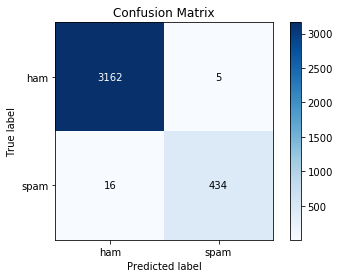

In [150]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_train, prediction)

 <img src="confusion_matrix.png" width="40%" >

### Conclusione

-Il mdello ha risposto correttamente 3162 volte per la classe ham ( True Positive). <br>
-5 email di spam sono ritenute valide (False Negative).  <br>
-16 volte il modello ha sbagliato nel predirre la classe (False Positive) ritenendo erroneamente si trattatasse di spam. <br> 
-prevedenedo invece bene 434 messaggi di spam(True Negative).  


In [151]:
#La precisione del modello è data dal:
#numero delle previsioni corrette sul totale delle previsioni positive del modello 
#sia corrette che sbagliate 
3162/(3162+16)  

0.9949653870358716